# Plotting 3D. 

<IPython.core.display.Javascript object>


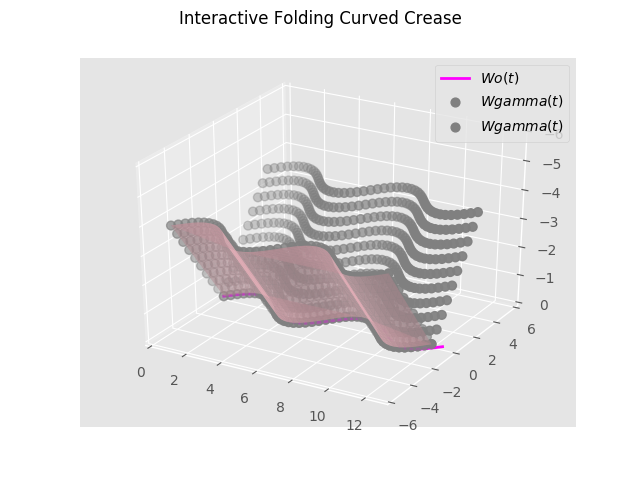

interactive(children=(IntSlider(value=50, description='n:', max=600, min=1), FloatSlider(value=0.0, descriptio…

In [43]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
from matplotlib import style
from mpl_toolkits.mplot3d import Axes3D # <--- This is important for 3d plotting 



import numpy as np

%matplotlib nbagg
style.use('ggplot')

fig = plt.figure()


ax = fig.add_subplot( projection='3d')
plt.suptitle('Interactive Folding Curved Crease')

'''


def Wo(x):
    return np.cos(x)*np.sin(x)*x
def dWodt(x):
    return x*np.cos(2*x) + np.sin(x)*np.cos(x)

'''
def Wo(t): 
     return np.sin(t)
def dWodt(t):
    return np.cos(t)

    

 

def dzdt(t, y, Gamma):
    '''
    Here the function dz/dt is written. We are asking later in the euler integration the slope of the
    z(t) function at different x values.
    
    '''
    fold_ang = Gamma/180 * np.pi # Degrees
    return np.sqrt(1-(np.tan(fold_ang)**2)*((dWodt(t))**2))




def euler(n, Gamma, length, steps):
    ax.clear()
    fold_ang = Gamma/180 * np.pi # Degrees
    x0 = 0 #Initial Conditions. Mandatory to solve the ODE
    y0 = 0 #Initial Conditions. Mandatory to solve the ODE
    xf = 4*np.pi #Limit of the calculation. Any value furder than 2pi will be a repetition. 
    h = (xf-x0)/n #Tiny steps definition
    x = [x0] #Array of the discrete estimated x values
    y = [y0] #Array of the discrete estimated y values

    for i in range(n):
        y0 = y0 + h * dzdt(x0,y0, Gamma)
        x0 = x0 + h
        x.append(x0)
        y.append(y0)
        
    z = []
    for i in x:
        z.append(Wo(i)/np.cos(fold_ang))
    
    h = []
    for i in y:
        h.append(0)
    print(len(h))
    print(len(z))
    print(range(n+1))
    
    yp=[]
    zp=[]
    hp=[]
    
    mesh_h = length / steps
    for stp in range(steps):
        for i in range(n+1):
            y.append(y[i])
            yp.append(y[i])
            
            z.append(z[i]-stp*mesh_h*np.cos(fold_ang))
            zp.append(z[i]+stp*mesh_h*np.cos(fold_ang))

            h.append((-stp)*np.sin(fold_ang))
            hp.append((-stp)*np.sin(fold_ang))

    #Ahora tengo todos los vectores con los mismos valores. 
    
    #y,z,h = np.meshgrid(y, z,h)
    
    ax.scatter(yp,zp,hp ,color = 'grey',linewidth = 1,s=40, label = '$Wgamma(t)$')

    ax.scatter(y,z,h ,color = 'grey',linewidth = 1,s=40, label = '$Wgamma(t)$')
    ax.plot(x, Wo(x), color = 'magenta', linewidth = 2 ,label = '$Wo(t)$')
    ax.plot_trisurf(y, z, h, vmax =0.1, shade = True, color = 'pink', alpha = 0.5)
    ax.set_xlim(0,13)
    ax.set_ylim(-6,6) 
    ax.set_zlim(0,-6) 

    
    
    plt.legend()
    plt.show()
    return x, y, z



length= widgets.FloatSlider(min=0, max=45, value=5, description='Side Length:')
steps = widgets.IntSlider(min=1, max=10, value=333, description='Mesh def:')
n = widgets.IntSlider(min=1, max=600, value=50, description='n:')
Gamma = widgets.FloatSlider(min=0, max=45, value=0, description='Fold it:')
    
widgets.interactive(euler, n=n, Gamma=Gamma, length = length, steps = steps)

## Exporting CSV

In [41]:
import csv
import numpy as np

'''


def Wo(x):
    return np.cos(x)*np.sin(x)*x
def dWodt(x):
    return x*np.cos(2*x) + np.sin(x)*np.cos(x)

'''
def Wo(t): 
     return np.sin(t)
def dWodt(t):
    return np.cos(t)

    


def dzdt(t, y, Gamma):
    '''
    Here the function dz/dt is written. We are asking later in the euler integration the slope of the
    z(t) function at different x values.
    
    '''
    fold_ang = Gamma/180 * np.pi # Degrees
    return np.sqrt(1-(np.tan(fold_ang)**2)*((dWodt(t))**2))




def euler(n, Gamma, length, steps):
    ax.clear()
    fold_ang = Gamma/180 * np.pi # Degrees
    x0 = 0 #Initial Conditions. Mandatory to solve the ODE
    y0 = 0 #Initial Conditions. Mandatory to solve the ODE
    xf = 4*np.pi #Limit of the calculation. Any value furder than 2pi will be a repetition. 
    h = (xf-x0)/n #Tiny steps definition
    x = [x0] #Array of the discrete estimated x values
    y = [y0] #Array of the discrete estimated y values

    for i in range(n):
        y0 = y0 + h * dzdt(x0,y0, Gamma)
        x0 = x0 + h
        x.append(x0)
        y.append(y0)
        
    z = []
    for i in x:
        z.append(Wo(i)/np.cos(fold_ang))
    
    h = []
    for i in y:
        h.append(0)
    return y,z,h

y,z,h = euler(50, 45, 10,10)

#exporting CSV
    
with open('points.csv', 'w') as f:
    write = csv.writer(f)
    for i in range(len(y)):
        write.writerow([y[i],z[i],h[i]])
    